## Limpieza


### Importacion de librerias

In [5]:
import pandas as pd
import numpy as np
import missingno as msno

### Lectura de CSV

In [6]:
datos = pd.read_csv('../../datos/brutos/trips_2021.csv')

In [3]:
common_na_strings = ["missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",]

common_na_numbers =[-9, -99, -999, -9999, 9999, 66, 77, 88, -1] 


In [4]:
datos = (
    datos
    .replace(
        to_replace=common_na_strings,  #Se le pasa el filtro de elementos que se tomaran como nulos/na
        value=np.nan #Este esl valor que tomaran todos los elementos que considan con el filtro
    )
)

In [5]:
datos = (
    datos
    .replace(
        to_replace=common_na_numbers,  #Se le pasa el filtro de elementos que se tomaran como nulos/na
        value=np.nan #Este esl valor que tomaran todos los elementos que considan con el filtro
    )
)

In [7]:
datos.isna()

,Unnamed: 0,Id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género,Género
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860086,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2860087,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2860088,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2860089,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


<AxesSubplot:>

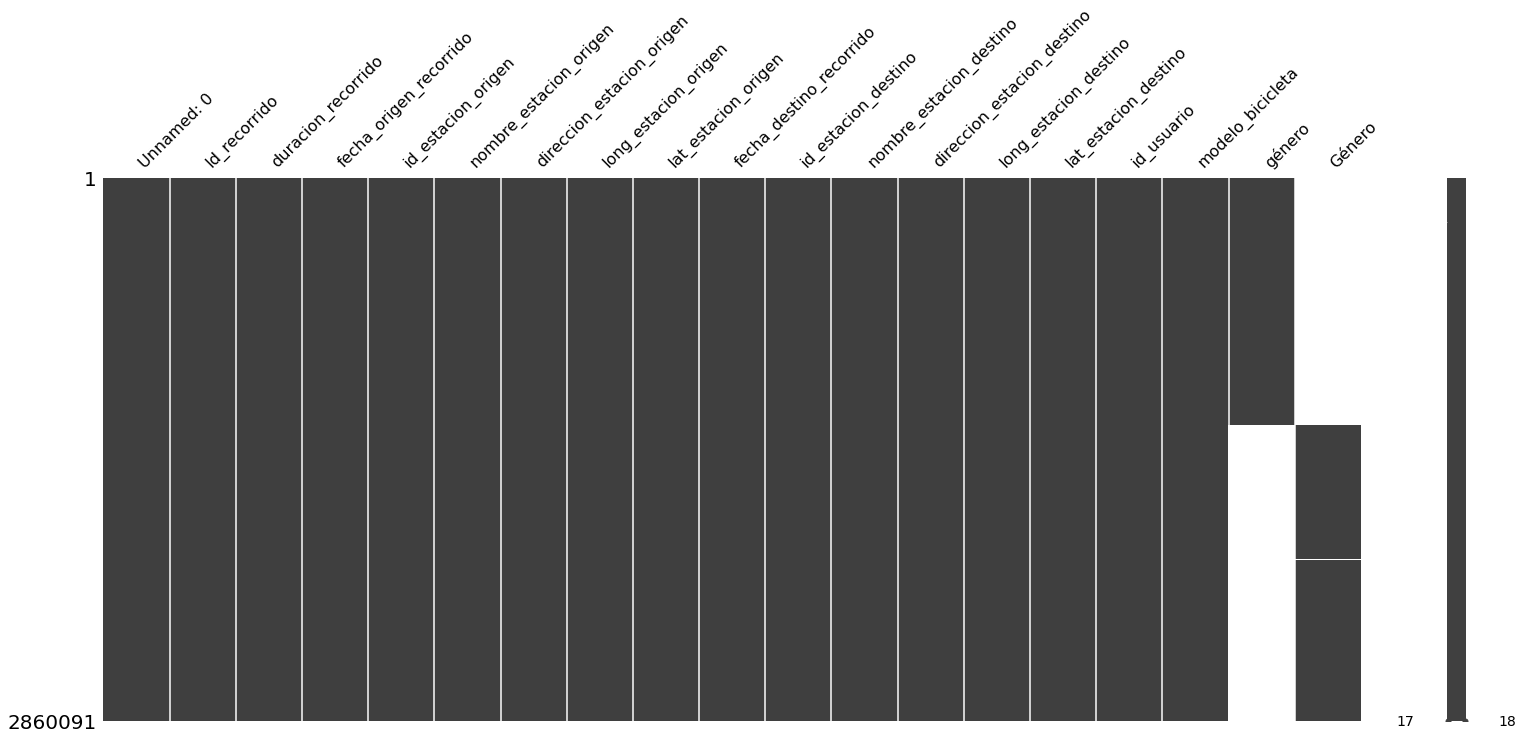

In [8]:
msno.matrix(datos)

In [13]:
datos.columns

Index(['Unnamed: 0', 'Id_recorrido', 'duracion_recorrido',
       'fecha_origen_recorrido', 'id_estacion_origen',
       'nombre_estacion_origen', 'direccion_estacion_origen',
       'long_estacion_origen', 'lat_estacion_origen',
       'fecha_destino_recorrido', 'id_estacion_destino',
       'nombre_estacion_destino', 'direccion_estacion_destino',
       'long_estacion_destino', 'lat_estacion_destino', 'id_usuario',
       'modelo_bicicleta', 'género', 'Género'],
      dtype='object')

In [10]:
datos[['género', 'Género']]

,género,Género
0,OTHER,NaN
1,OTHER,NaN
2,FEMALE,NaN
3,FEMALE,NaN
4,FEMALE,NaN
...,...,...
2860086,NaN,MALE
2860087,NaN,MALE
2860088,NaN,MALE
2860089,NaN,FEMALE


Se obvserva dos columnas con el mismo nombre y con valores faltantes en uno mientras que en el otro tiene algun otro valor, se reuniran en una sola.

In [11]:
#Se crea funcion que modficara el dataframe en la columna genero
def genero_row(row):
    # Comprobar si la columna vacía está vacía y la columna de reemplazo no está vacía
    if pd.isnull(row['género']) and pd.notnull(row['Género']):
        row['género'] = row['Género']
    
    return row

In [12]:
datos = datos.apply(genero_row, axis=1)

KeyboardInterrupt: 

### Valores faltantes implicitos

In [ ]:
(#Completa las categorias para que todas tengan la misma cantidad (mañana, tarde, noche)
 #Los valores de la columna value, tomara el formato Nan si antes no existia un registro
    implicit_to_explicit_df
    .complete(
        "name",
        "time",
    )
)

### Guardado del archivo

In [ ]:
# Guarda el DataFrame limpio en un nuevo archivo CSV
datos.to_csv('../../datos/procesados/01_ecobici_limpios.csv', index=False)